# Q1a)

In [ ]:
import numpy as np
import torch
import matplotlib.pylab as plt

In [ ]:
lr = 0.05
num_epochs = 5000

In [ ]:
# Training data
X = torch.tensor(np.array([[1.0,3.0],[-2.0,-2.0]]))
Y = torch.tensor(np.array([[0.0, 1.0],[1.0,0.0]]))

print('x: %s, y: %s'%(X.numpy(), Y.numpy()))

x: [[ 1.  3.]
 [-2. -2.]], y: [[0. 1.]
 [1. 0.]]


In [ ]:
V_init = [[1.0,1.0],[0,-2]]
c_init = [-2.0,3.0]

W_init = [[1.0,2.0],[-2.0,0]]
b_init = [3.0,-1.0]

In [ ]:
class Two_Layer_DNN():
  def __init__(self):
    self.V = torch.tensor(V_init, dtype=torch.double)
    self.c = torch.tensor(c_init, dtype=torch.double)
    self.W = torch.tensor(W_init, dtype=torch.double)
    self.b = torch.tensor(b_init, dtype=torch.double)

  def __call__(self, x):
    z = torch.matmul(x, self.W) + self.b
    h = torch.sigmoid(z)
    u = torch.matmul(h, self.V) + self.c
    y = torch.sigmoid(u)
    return z,h,u,y

In [ ]:
def loss(targets, outputs):
  return torch.mean(torch.sum(torch.square(targets - outputs), dim=1))

In [ ]:
def train(model, inputs, d, learning_rate):
  z, h, u, y = model(inputs)
  dy = y*(1-y)
  grad_u = -(d-y)*dy
  grad_V = torch.matmul(torch.transpose(h,0,1),grad_u)
  grad_c = torch.sum(grad_u, axis=0)

  dh = h*(1-h)
  grad_z = torch.matmul(grad_u, torch.transpose(model.V,0,1))*dh
  grad_W = torch.matmul(torch.transpose(inputs, 0, 1), grad_z)
  grad_b = torch.sum(grad_z, axis=0)

  model.W -= learning_rate*grad_W
  model.b -= learning_rate*grad_b
  model.V -= learning_rate*grad_V
  model.c -= learning_rate*grad_c

  return dy, grad_u, dh, grad_z

In [ ]:
model = Two_Layer_DNN()

print('W = {} ,b = {}'.format(model.W.numpy(),model.b.numpy()))
print('V = {} ,c = {}'.format(model.V.numpy(),model.c.numpy()))

W = [[ 1.  2.]
 [-2.  0.]] ,b = [ 3. -1.]
V = [[ 1.  1.]
 [ 0. -2.]] ,c = [-2.  3.]


In [ ]:
err=[]
for epoch in range(num_epochs):
  z_, h_, u_, y_ = model(X)
  cost_ = loss(Y,y_)
  dy_,grad_u_, dh_, grad_z_ = train(model, X, Y, lr)

  err.append(cost_)

  if epoch==0:
    print('epoch:{}'.format(epoch+1))
    print('z: {}'.format(z_))
    print('h: {}'.format(h_))
    print('u: {}'.format(u_))
    print('y: {}'.format(y_))
    print('dy: {}'.format(dy_))
    print('grad_u: {}'.format(grad_u_))
    print('dh: {}'.format(dh_))
    print('grad_z: {}'.format(grad_z_))
    print('cost: {}'.format(cost_))
    print('W = {},b = {}'.format(model.W.numpy(), model.b.numpy()))
    print('V = {},c = {}'.format(model.V.numpy(), model.c.numpy()))

  if not epoch%100:
    print('epoch:{}, error: {}'.format(epoch,err[epoch]))

epoch:1
z: tensor([[-2.,  1.],
        [ 5., -5.]], dtype=torch.float64)
h: tensor([[0.1192, 0.7311],
        [0.9933, 0.0067]], dtype=torch.float64)
u: tensor([[-1.8808,  1.6571],
        [-1.0067,  3.9799]], dtype=torch.float64)
y: tensor([[0.1323, 0.8398],
        [0.2676, 0.9817]], dtype=torch.float64)
dy: tensor([[0.1148, 0.1345],
        [0.1960, 0.0180]], dtype=torch.float64)
grad_u: tensor([[ 0.0152, -0.0215],
        [-0.1435,  0.0177]], dtype=torch.float64)
dh: tensor([[0.1050, 0.1966],
        [0.0066, 0.0066]], dtype=torch.float64)
grad_z: tensor([[-0.0007,  0.0085],
        [-0.0008, -0.0002]], dtype=torch.float64)
cost: 0.7715845238082222
W = [[ 9.99949679e-01  1.99955297e+00]
 [-1.99998360e+00 -1.29409093e-03]],b = [ 3.0000752  -1.00041178]
V = [[ 1.00703881e+00  9.99250433e-01]
 [-5.07093853e-04 -1.99921852e+00]],c = [-1.99358199  3.0001932 ]
epoch:0, error: 0.7715845238082222
epoch:100, error: 0.611730256545099
epoch:200, error: 0.5595027765634414
epoch:300, error: 0.5

In [ ]:
print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

_,_,_,y_ = model(X)
mse = loss(Y,y_)

print('y: {}'.format(y_))
print('mse: {}'.format(mse))

W = [[ 0.62506067  0.60035651]
 [-2.99956491 -1.99248792]], b = [ 2.71900048 -0.74481158]
V = [[ 4.97482301 -3.46352222]
 [ 0.24645499 -2.37263065]], c = [-2.42727341  2.56119537]
y: tensor([[0.0825, 0.9272],
        [0.9406, 0.0474]], dtype=torch.float64)
mse: 0.00893967413388871


Text(0.5, 1.0, 'GD learning')

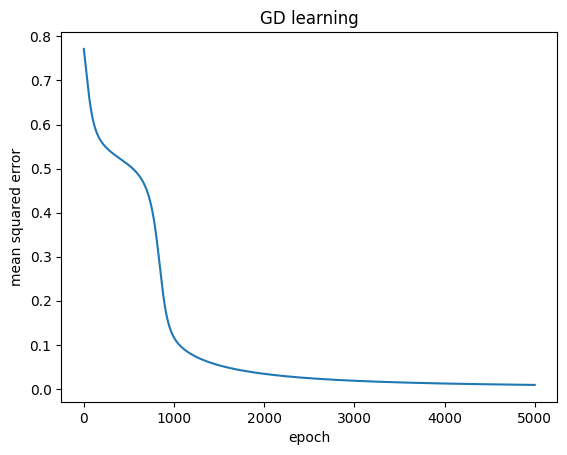

In [ ]:
plt.figure(1)
plt.plot(range(num_epochs),err)
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.title('GD learning')

# Q1b)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lr = 0.05
num_epochs = 5000

seed = 10
np.random.seed(seed)

In [ ]:
# Training data
X = torch.tensor(np.array([[1.0, 3.0], [-2.0, -2.0]]))
Y = torch.tensor(np.array([[0.0, 1.0], [1.0, 0.0]]))

print('x: %s,y: %s'%(X.numpy(),Y.numpy()))

x: [[ 1.  3.]
 [-2. -2.]],y: [[0. 1.]
 [1. 0.]]


In [ ]:
V_init = [[1.0,1.0],[0, -2]]
c_init = [-2.0, 3.0]
W_init = [[1.0, 2.0],[-2.0, 0]]
b_init = [3.0, -1.0]

In [ ]:
class Two_Layer_DNN():
  def __init__(self):
    self.V = torch.tensor(V_init,dtype=torch.double)
    self.c = torch.tensor(c_init, dtype=torch.double)
    self.W = torch.tensor(W_init,dtype=torch.double)
    self.b = torch.tensor(b_init,dtype=torch.double)

  def __call__(self, x):
    z = torch.inner(torch.transpose(self.W, 0, 1), x) + self.b
    h = torch.sigmoid(z)
    u = torch.inner(torch.transpose(self.V, 0 , 1), h) + self.c
    y = torch.sigmoid(u)
    return z, h, u, y

In [ ]:
def loss(targets, outputs):
  return torch.sum(torch.square(targets - outputs), dim=0)

In [ ]:
def train(model, inputs, d, learning_rate):
  z, h, u, y = model(inputs)
  dy = y*(1-y)
  grad_u = -(d-y)*dy

  grad_V = torch.outer(h, grad_u)
  grad_c = grad_u

  dh = h*(1-h)
  grad_z = torch.matmul(model.V, grad_u)*dh

  grad_W = torch.outer(inputs, grad_z)
  grad_b = grad_z

  model.W -= learning_rate * grad_W
  model.b -= learning_rate * grad_b
  model.V -= learning_rate * grad_V
  model.c -= learning_rate * grad_c

  return dy, grad_u, dh, grad_z

In [ ]:
model = Two_Layer_DNN()

print('W = {},b = {}'.format(model.W.numpy(),model.b.numpy()))
print('V = {},c = {}'.format(model.V.numpy(),model.c.numpy()))

W = [[ 1.  2.]
 [-2.  0.]],b = [ 3. -1.]
V = [[ 1.  1.]
 [ 0. -2.]],c = [-2.  3.]


In [ ]:
err = []
idx = np.arange(2)
for epoch in range(num_epochs):
  ###
  np.random.shuffle(idx)
  X, Y=X[idx],Y[idx]
  ###

  cost_ = []

  ###
  for p in [0,1]:
  ###

    z_, h_, u_, y_ = model(X[p])
    loss_ = loss(Y[p], y_)
    dy_, grad_u_, dh_, grad_z_ = train(model, X[p], Y[p], lr)

    if epoch == 0:
      print('epoch: {}, pattern = {}'.format(epoch+1, [X[p],Y[p]]))
      print('z: {}'.format(z_))
      print('h: {}'.format(h_))
      print('u: {}'.format(u_))
      print('y: {}'.format(y_))
      print('dy: {}'.format(dy_))
      print('grad_u: {}'.format(grad_u_))
      print('dh: {}'.format(dh_))
      print('grad_z: {}'.format(grad_z_))
      print('cost: {}'.format(loss_))
      print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
      print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

    cost_.append(loss_)

  err.append(np.mean(cost_))

  if not epoch%100:
    print('epoch:{}, error: {}'.format(epoch, err[epoch]))

epoch: 1, pattern = [tensor([1., 3.], dtype=torch.float64), tensor([0., 1.], dtype=torch.float64)]
z: tensor([-2.,  1.], dtype=torch.float64)
h: tensor([0.1192, 0.7311], dtype=torch.float64)
u: tensor([-1.8808,  1.6571], dtype=torch.float64)
y: tensor([0.1323, 0.8398], dtype=torch.float64)
dy: tensor([0.1148, 0.1345], dtype=torch.float64)
grad_u: tensor([ 0.0152, -0.0215], dtype=torch.float64)
dh: tensor([0.1050, 0.1966], dtype=torch.float64)
grad_z: tensor([-0.0007,  0.0085], dtype=torch.float64)
cost: 0.04315175906992553
W = [[ 1.00003336e+00  1.99957647e+00]
 [-1.99989993e+00 -1.27058679e-03]], b = [ 3.00003336 -1.00042353]
V = [[ 9.99909483e-01  1.00012839e+00]
 [-5.55130864e-04 -1.99921260e+00]], c = [-2.00075935  3.00107707]
epoch: 1, pattern = [tensor([-2., -2.], dtype=torch.float64), tensor([1., 0.], dtype=torch.float64)]
z: tensor([ 4.9998, -4.9970], dtype=torch.float64)
h: tensor([0.9933, 0.0067], dtype=torch.float64)
u: tensor([-1.0075,  3.9811], dtype=torch.float64)
y: tens

In [ ]:
print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

y = []
for p in [0,1]:
  _,_,_,y_ = model(X[p])
  y.append(y_)

print('y: {}'.format(y_))
print('error: {}'.format(err[-1]))

W = [[ 0.62504926  0.60033369]
 [-2.999679   -1.99220612]], b = [ 2.71892918 -0.74457171]
V = [[ 4.97586913 -3.4638483 ]
 [ 0.24579571 -2.37276536]], c = [-2.42746897  2.56134334]
y: tensor([0.0824, 0.9272], dtype=torch.float64)
error: 0.008940290141285143


Text(0.5, 1.0, 'SGD learning')

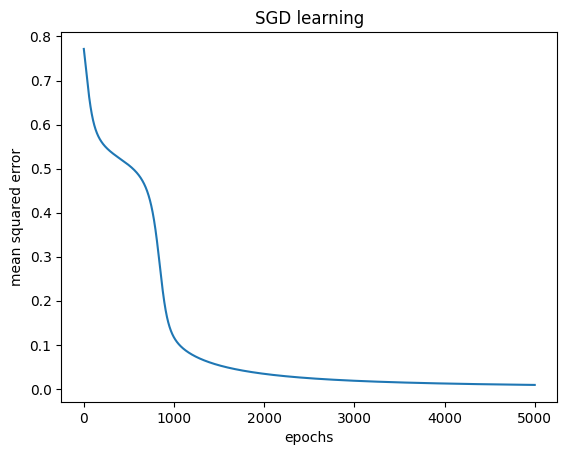

In [ ]:
plt.figure(1)
plt.plot(range(num_epochs),err)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.title('SGD learning')

# Q2

In [ ]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [ ]:
lr = 0.1
num_epochs = 500

In [ ]:
X = torch.tensor(np.array([[1.0,1.0],[0.0,1.0],[3.0,4.0],[2.0,2.0],[2.0,-2.0],[-2.0,-3.0]]))
Y = torch.tensor(np.array([0, 0, 1, 1, 2, 2]))
K = torch.tensor(np.array([[1,0,0],
                           [1,0,0],
                           [0,1,0],
                           [0,1,0],
                           [0,0,1],
                           [0,0,1]]).astype(float))

In [ ]:
W_init = [[-0.10, 0.97,0.18],
          [-0.7,0.38,0.93]]
b_init = [0.0,0.0,0.0]
V_init = [[1.01,0.09,-0.39],
          [0.79,-0.45,-0.22],
          [0.28,0.96,-0.07]]
c_init = [0.0,0.0,0.0]

In [ ]:
class Two_Layer_DNN_Classifier():
  def __init__(self):
    self.V = torch.tensor(V_init, dtype=torch.double)
    self.c = torch.tensor(c_init, dtype=torch.double)
    self.W = torch.tensor(W_init, dtype=torch.double)
    self.b = torch.tensor(b_init, dtype=torch.double)

  def __call__(self, x):
    z = torch.matmul(x, self.W) + self.b
    h = torch.sigmoid(z)
    u = torch.matmul(h, self.V) + self.c
    p = torch.exp(u)/torch.sum(torch.exp(u), axis=1, keepdim=True)
    y = torch.argmax(p, axis=1)
    return z, h, u, p, y

In [ ]:
def loss(k,y,p):
  entropy = -torch.sum(torch.log(p)*k)
  error = torch.sum(torch.not_equal(torch.argmax(k,dim=1),y))
  return entropy, error

In [ ]:
def train(model, inputs, k, learning_rate):
  z, h, u, p, y = model(inputs)
  grad_u = -(k-p)
  grad_V = torch.matmul(torch.transpose(h,0,1), grad_u)
  grad_c = torch.sum(grad_u, axis=0)

  dh = h*(1-h)
  grad_z = torch.matmul(grad_u, torch.transpose(model.V, 0, 1))*dh
  grad_W = torch.matmul(torch.transpose(inputs, 0, 1), grad_z)
  grad_b = torch.sum(grad_z, axis=0)

  model.W -= learning_rate*grad_W
  model.b -= learning_rate*grad_b
  model.V -= learning_rate*grad_V
  model.c -= learning_rate*grad_c

  return grad_u, dh, grad_z

In [ ]:
model = Two_Layer_DNN_Classifier()

print('W = {},b = {}'.format(model.W.numpy(),model.b.numpy()))
print('V = {},c = {}'.format(model.V.numpy(),model.c.numpy()))

W = [[-0.1   0.97  0.18]
 [-0.7   0.38  0.93]],b = [0. 0. 0.]
V = [[ 1.01  0.09 -0.39]
 [ 0.79 -0.45 -0.22]
 [ 0.28  0.96 -0.07]],c = [0. 0. 0.]


In [ ]:
entropy, err = [],[]
for epoch in range(num_epochs):
  z_,h_,u_,p_,y_ = model(X)
  entropy_, err_ = loss(K, y_, p_)
  grad_u_, dh_, grad_z_ = train(model, X, K, lr)

  if epoch == 0:
    print('epoch: {}'.format(epoch+1))
    print('z: {}'.format(z_))
    print('h: {}'.format(h_))
    print('u: {}'.format(u_))
    print('p: {}'.format(p_))
    print('y: {}'.format(y_))
    print('entropy: {}'.format(entropy_))
    print('error: {}'.format(err_))
    print('grad_u: {}'.format(grad_u_))
    print('dh: {}'.format(dh_))
    print('grad_z: {}'.format(grad_z_))
    print('W = {},b = {}'.format(model.W.numpy(), model.b.numpy()))
    print('V = {},c = {}'.format(model.V.numpy(),model.c.numpy()))

  entropy.append(entropy_)
  err.append(err_)

  if not epoch%100:
    print('epoch:%d, error:%g, entropy:%g'%(epoch, err[epoch], entropy[epoch]))

epoch: 1
z: tensor([[-0.8000,  1.3500,  1.1100],
        [-0.7000,  0.3800,  0.9300],
        [-3.1000,  4.4300,  4.2600],
        [-1.6000,  2.7000,  2.2200],
        [ 1.2000,  1.1800, -1.5000],
        [ 2.3000, -3.0800, -3.1500]], dtype=torch.float64)
h: tensor([[0.3100, 0.7941, 0.7521],
        [0.3318, 0.5939, 0.7171],
        [0.0431, 0.9882, 0.9861],
        [0.1680, 0.9370, 0.9020],
        [0.7685, 0.7649, 0.1824],
        [0.9089, 0.0439, 0.0411]], dtype=torch.float64)
u: tensor([[ 1.1511,  0.3926, -0.3483],
        [ 1.0051,  0.4510, -0.3103],
        [ 1.1003,  0.5058, -0.3032],
        [ 1.1625,  0.4594, -0.3348],
        [ 1.4316, -0.0999, -0.4808],
        [ 0.9642,  0.1015, -0.3670]], dtype=torch.float64)
p: tensor([[0.5911, 0.2769, 0.1320],
        [0.5426, 0.3118, 0.1456],
        [0.5563, 0.3070, 0.1367],
        [0.5818, 0.2880, 0.1302],
        [0.7332, 0.1585, 0.1083],
        [0.5931, 0.2503, 0.1567]], dtype=torch.float64)
y: tensor([0, 0, 0, 0, 0, 0])
entropy: 

In [ ]:
print('W = {},b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {},c = {}'.format(model.V.numpy(), model.c.numpy()))

print('outputs: {}'.format(y_))
print('entropy: %g'%entropy[-1])
print('error: %g'%err[-1])

W = [[-1.80267137  0.31596718  0.09123146]
 [-1.40090016  2.927402    1.9063486 ]],b = [ 4.35090221  0.73119259 -1.72284193]
V = [[ 2.91890488 -5.32695673  3.11805185]
 [ 2.81049361  1.19218685 -3.88268046]
 [ 0.07463652  4.55452175 -3.45915827]],c = [-1.93824763 -0.06070438  1.998952  ]
outputs: tensor([0, 0, 1, 1, 2, 2])
entropy: 0.138053
error: 0


Text(0.5, 1.0, 'GD learning')

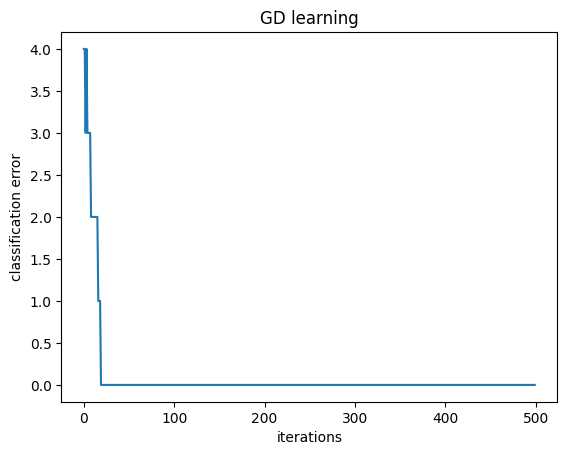

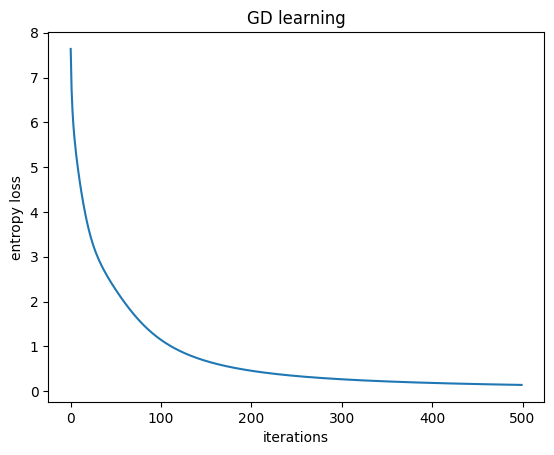

In [ ]:
plt.figure(1)
plt.plot(range(num_epochs),err)
plt.xlabel('iterations')
plt.ylabel('classification error')
plt.title('GD learning')

plt.figure(2)
plt.plot(range(num_epochs), entropy)
plt.xlabel('iterations')
plt.ylabel('entropy loss')
plt.title('GD learning')

In [ ]:
# Test inputs
XX = torch.tensor(np.array([[2.5,1.5],
                            [-1.5,0.5]]))
z_, h_, u_, p_, y_ = model(XX)

print('z: {}'.format(z_))
print('h: {}'.format(h_))
print('u: {}'.format(u_))
print('p: {}'.format(p_))
print('y: {}'.format(y_))

z: tensor([[-2.2571,  5.9122,  1.3648],
        [ 6.3545,  1.7209, -0.9065]], dtype=torch.float64)
h: tensor([[0.0947, 0.9973, 0.7965],
        [0.9983, 0.8483, 0.2877]], dtype=torch.float64)
u: tensor([[ 1.2006,  4.2514, -4.3332],
        [ 3.3811, -3.0567,  0.8229]], dtype=torch.float64)
p: tensor([[4.5175e-02, 9.5465e-01, 1.7848e-04],
        [9.2675e-01, 1.4827e-03, 7.1771e-02]], dtype=torch.float64)
y: tensor([1, 0])


# Q3a)

In [24]:
import torch
from torch import nn

import numpy as np
import matplotlib.pylab as plt

In [25]:
device = (
    "cuda" if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [26]:
# set learning parameters
lr = 0.01
no_epochs = 3000

seed = 100
np.random.seed(seed)
torch.manual_seed(seed)

In [27]:
# generate training data
X = np.zeros((9*9, 2)).astype(np.float32)
p = 0
for i in np.arange(-1,1.001,0.25):
  for j in np.arange(-1,1.001,0.25):
    X[p] = [i, j]
    p += 1

np.random.shuffle(X)
Y = np.zeros((9*9, 1)).astype(np.float32)
Y[:,0] = 0.8*X[:,0]**2 - X[:,1]**3 + 2.5*X[:,0]*X[:,1]

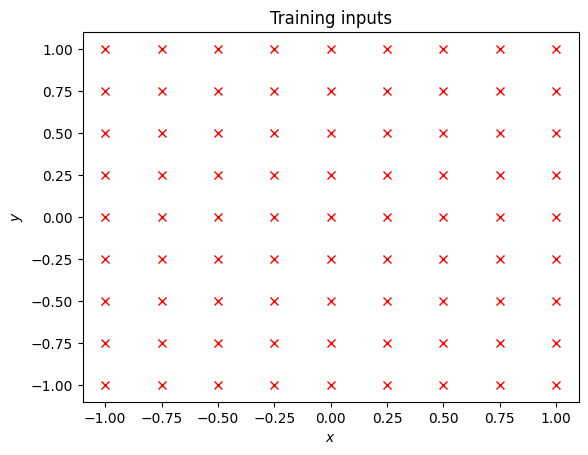

In [28]:
# plot training inputs
plt.figure(1)
plt.plot(X[:,0],X[:,1], 'rx')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Training inputs')
plt.show()

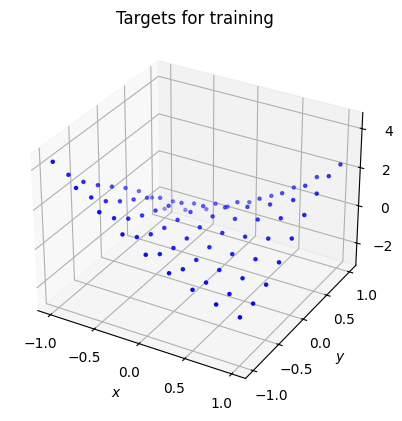

In [29]:
# plot targets
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],Y[:,0], color='blue',marker='.')
ax.set_title('Targets for training')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel(r'$\phi$, fontsize=16, color='r'')
ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_zticks([-2,0,2,4])
plt.show()

In [33]:
# Build the neural network
class FFN(nn.Module):
  def __init__(self):
    super().__init__()
    self.relu_stack = nn.Sequential(
        nn.Linear(2,10),
        nn.ReLU(),
        nn.Linear(10,5),
        nn.ReLU(),
        nn.Linear(5,1),
    )


  def forward(self, x):
    logits = self.relu_stack(x)
    return logits

In [34]:
# set the optimiser, cost, measures for learning
def train_loop(X, Y, model, loss_fn, optimiser):
  pred = model(X)
  loss = loss_fn(pred, Y)

  # Backpropagation
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  return loss.item()

In [36]:
# learn the model
model = FFN().to(device)

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values: {param} \n")

Model structure: FFN(
  (relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)


Layer: relu_stack.0.weight | Size: torch.Size([10, 2]) | Values: Parameter containing:
tensor([[-0.3899,  0.5565],
        [-0.6368, -0.4554],
        [-0.2813, -0.4394],
        [ 0.5920, -0.4057],
        [-0.1476,  0.1438],
        [-0.1083,  0.0317],
        [-0.1167, -0.6590],
        [ 0.5879, -0.2717],
        [ 0.1795,  0.4634],
        [ 0.2254, -0.5817]], requires_grad=True) 

Layer: relu_stack.0.bias | Size: torch.Size([10]) | Values: Parameter containing:
tensor([-0.0156,  0.1255,  0.3309,  0.4946,  0.5815, -0.0216,  0.6273, -0.1549,
        -0.3537, -0.2537], requires_grad=True) 

Layer: relu_stack.2.weight | Size: torch.Size([5, 10]) | Values: Parameter containing:
tensor([[ 0.3006,  0.1633,  0.1068, -0.1486, -

In [37]:
loss_fn = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(),lr=lr)

train_loss_ =[]

for epoch in range(no_epochs):
  train_loss = train_loop(torch.tensor(X, device=device), torch.tensor(Y, device=device), model, loss_fn, optimiser)

  train_loss_.append(train_loss)

  if epoch%100 == 99:
    print(f"Epoch {epoch+1}, train_loss {train_loss:>7f}")
print("Done!")

Epoch 100, train_loss 1.328620
Epoch 200, train_loss 1.133531
Epoch 300, train_loss 0.893723
Epoch 400, train_loss 0.683466
Epoch 500, train_loss 0.506608
Epoch 600, train_loss 0.373385
Epoch 700, train_loss 0.296177
Epoch 800, train_loss 0.244211
Epoch 900, train_loss 0.205146
Epoch 1000, train_loss 0.175041
Epoch 1100, train_loss 0.153279
Epoch 1200, train_loss 0.135450
Epoch 1300, train_loss 0.120722
Epoch 1400, train_loss 0.108416
Epoch 1500, train_loss 0.096895
Epoch 1600, train_loss 0.087105
Epoch 1700, train_loss 0.078720
Epoch 1800, train_loss 0.072287
Epoch 1900, train_loss 0.067113
Epoch 2000, train_loss 0.062812
Epoch 2100, train_loss 0.059018
Epoch 2200, train_loss 0.055700
Epoch 2300, train_loss 0.052822
Epoch 2400, train_loss 0.050508
Epoch 2500, train_loss 0.048476
Epoch 2600, train_loss 0.046582
Epoch 2700, train_loss 0.044794
Epoch 2800, train_loss 0.043099
Epoch 2900, train_loss 0.041255
Epoch 3000, train_loss 0.039202
Done!


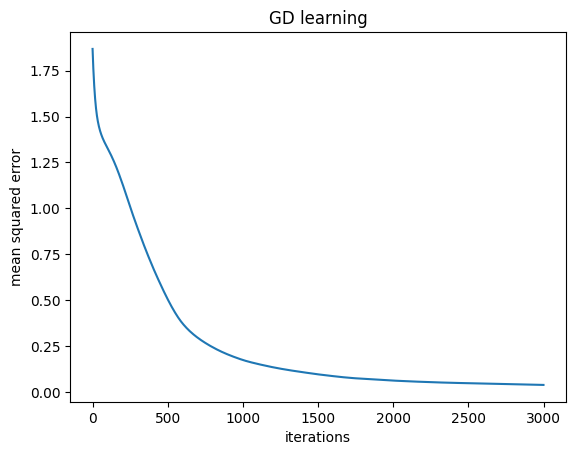

In [38]:
# plot learning curves
plt.figure(1)
plt.plot(range(no_epochs), train_loss_)
plt.xlabel('iterations')
plt.ylabel('mean squared error')
plt.title('GD learning')
plt.show()

In [39]:
# print final errors
print('Train MSE=%3.3f'%(train_loss_[-1]))

Train MSE=0.039


In [40]:
# find network predictions
pred = model(torch.tensor(X, device=device))

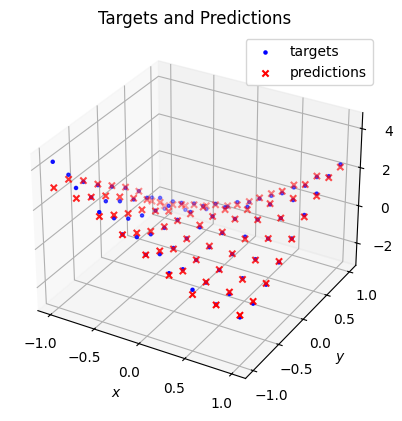

In [42]:
# plot targets and predicted points
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], color='blue', marker='.', label='targets')
ax.scatter(X[:,0], X[:,1], pred[:,0].cpu().detach().numpy(), color='red', marker='x', label='predictions')
ax.set_title('Targets and Predictions')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel(r'$\phi$')
ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_zticks([-2.0, 0, 2, 4])
ax.legend()
plt.show()

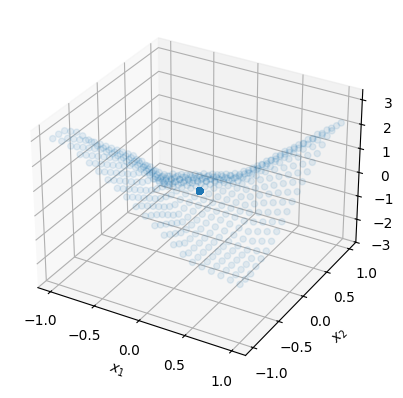

In [44]:
fig = plt.figure(5)
ax = plt.axes(projection='3d')
X1 = np.arange(-1, 1.001, 0.1).astype(np.float32)
X2 = np.arange(-1, 1.001, 0.1).astype(np.float32)
X1,X2 = np.meshgrid(X1,X2)
nX = np.size(X1)
XX = np.zeros((nX*nX, 2)).astype(np.float32)
p = 0
for i in np.arange(-1, 1.001, 0.1):
  for j in np.arange(-1, 1.001, 0.1):
    XX[p] = [i,j]
    p+=1
Z = model(torch.tensor(XX,device=device))
regression_plane = ax.scatter(XX[:,0],XX[:,1], Z[:,0].cpu().detach().numpy(), alpha=0.1)
ax.set_zticks([-3,-2,-1,0,1,2,3])
ax.set_xticks([-1.0,-0.5,0,0.5,1.0])
ax.set_yticks([-1.0,-0.5,0,0.5,1.0])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.show()

# Q3b)

In [66]:
import torch
from torch import nn

import numpy as np
import pylab as plt
import matplotlib.pyplot as plt

# parameters
no_epochs = 5000
seed = 100
np.random.seed(seed)
torch.manual_seed(seed)

# generate data
X = np.zeros((9*9,2)).astype(np.float32)
p=0
for i in np.arange(-1,1.001,0.25):
  for j in np.arange(-1, 1.001, 0.25):
    X[p] = [i,j]
    p+=1

np.random.shuffle(X)
Y = np.zeros((9*9, 1)).astype(np.float32)
Y[:,0] = 0.8*X[:,0]**2 - X[:,1]**3 + 2.5*X[:,0]*X[:,1]

X_tensor = torch.tensor(X)
Y_tensor = torch.tensor(Y)

class FFN(nn.Module):
  def __init__(self):
    super().__init__()
    self.relu_stack = nn.Sequential(
        nn.Linear(2,10),
        nn.ReLU(),
        nn.Linear(10,5),
        nn.ReLU(),
        nn.Linear(5,1),
    )

  def forward(self,x):
    return self.relu_stack(x)

def train_loop(X, Y, model, loss_fn, optimiser):
  pred = model(X)
  loss = loss_fn(pred,Y)

  # Backpropagation
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  return loss.item()

loss_fn = nn.MSELoss()

def my_train(rate):
  model = FFN()
  optimiser = torch.optim.SGD(model.parameters(), lr=rate)

  train_loss_ = []
  for epoch in range(no_epochs):
    train_loss = train_loop(X_tensor, Y_tensor, model, loss_fn, optimiser)
    train_loss_.append(train_loss)

  return train_loss_

lr=0.001: 5000 losses
lr=0.005: 5000 losses
lr=0.01: 5000 losses
lr=0.05: 5000 losses


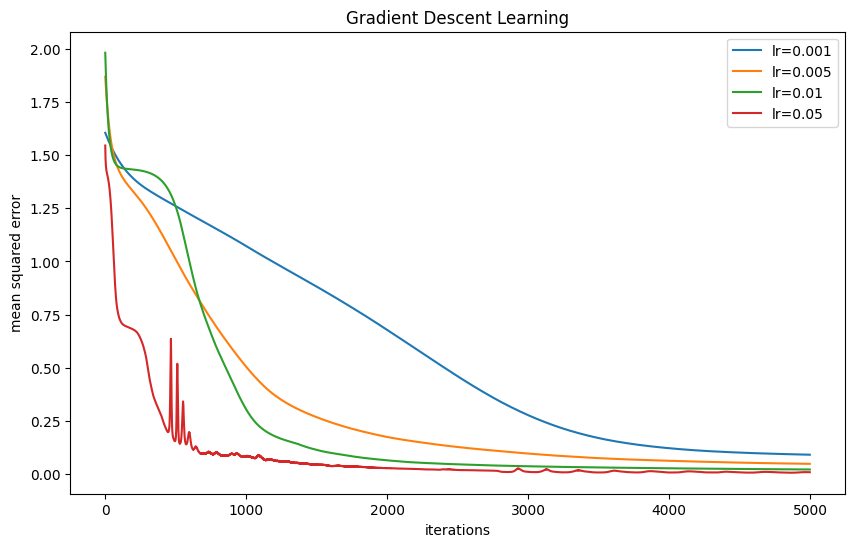

In [67]:
rates = [0.001,0.005,0.01,0.05]
costs = [my_train(r) for r in rates]

for i, c in enumerate(costs):
  print(f"lr={rates[i]}: {len(c)} losses")

# plot
plt.figure(figsize=(10,6))
for r in range(len(rates)):
  plt.plot(range(no_epochs), costs[r], label=f'lr={rates[r]}')

plt.xlabel('iterations')
plt.ylabel('mean squared error')
plt.title('Gradient Descent Learning')
plt.legend()
plt.show()